# Scanpy: Clustering

In this tutorial we will continue the analysis of the integrated dataset. We will use the scanpy enbedding to perform the clustering using graph community detection algorithms.

Let's first load all necessary libraries and also the integrated dataset from the previous step.


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()


In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
# select the scanorama integration data.

save_file = './data/results/scanpy_scanorama_corrected_covid.h5ad'
adata = sc.read_h5ad(save_file)


In [4]:
adata

AnnData object with n_obs × n_vars = 5590 × 3065
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'Scanorama', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Graph clustering
***

The procedure of clustering on a Graph can be generalized as 3 main steps:

1) Build a kNN graph from the data

2) Prune spurious connections from kNN graph (optional step). This is a SNN graph.

3) Find groups of cells that maximizes the connections within the group compared other groups.

If you recall from the integration, we already constructed a knn graph before running UMAP. Hence we do not need to do it again, and can run the community detection right away.

The modularity optimization algoritm in Scanpy are *Leiden* and *Louvain*. Lets test both and see how they compare.

###Leiden


In [5]:
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")


running Leiden clustering
    finished: found 16 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


Plot the clusters, as you can see, with increased resolution, we get higher granularity in the clustering.


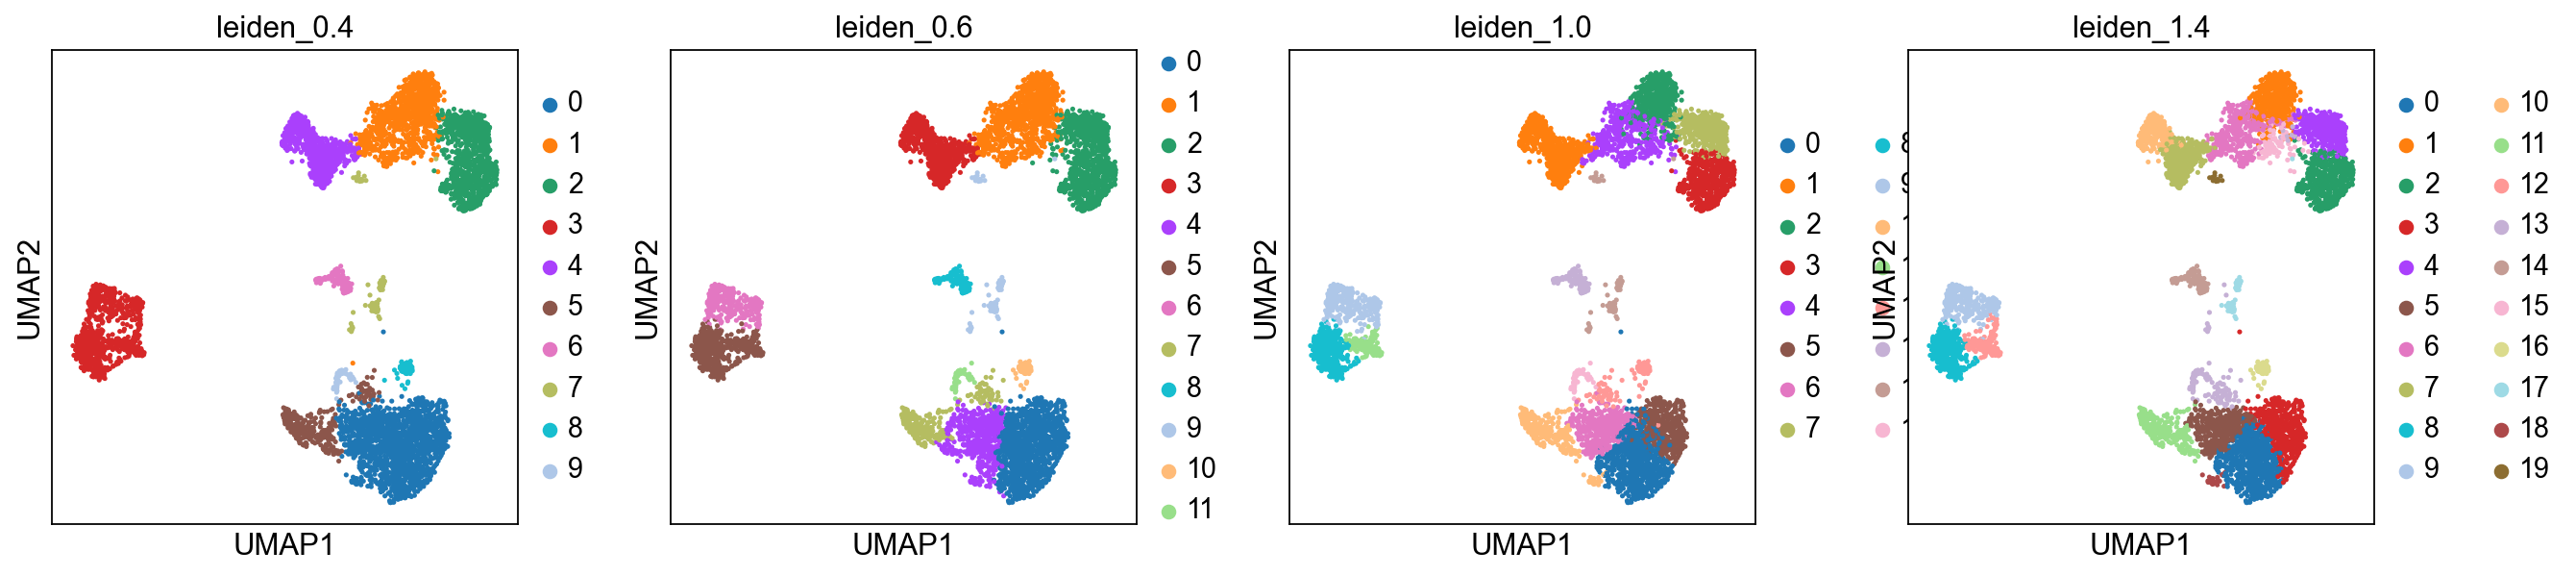

In [6]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6', 'leiden_1.0','leiden_1.4'])

 Once we have done clustering, the relationships between clusters can be calculated as correlation in PCA space and we also visualize some of the marker genes that we used in the Dim Reduction lab onto the clusters.


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['leiden_0.6']"]`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.6']`


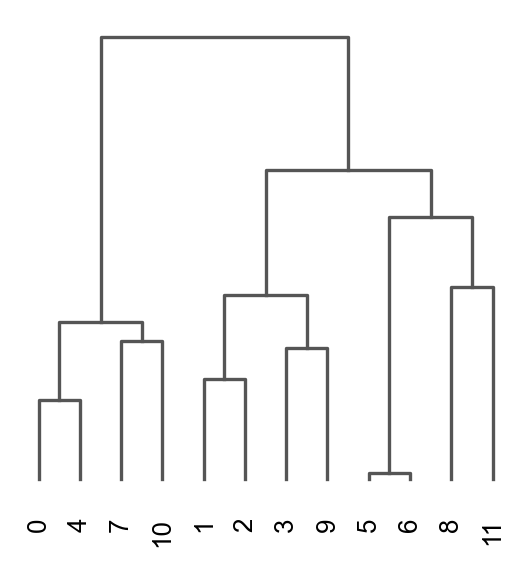

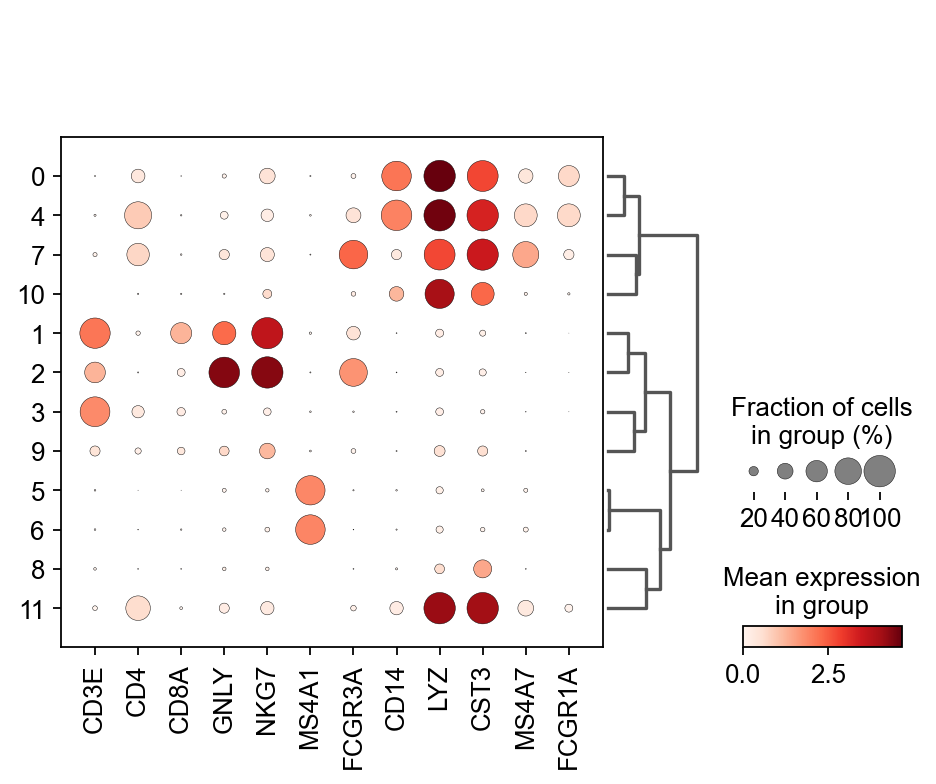

In [7]:
sc.tl.dendrogram(adata, groupby = "leiden_0.6")
sc.pl.dendrogram(adata, groupby = "leiden_0.6")

genes  = ["CD3E", "CD4", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7","FCGR1A"]
sc.pl.dotplot(adata, genes, groupby='leiden_0.6', dendrogram=True)

Plot proportion of cells from each condition per cluster.

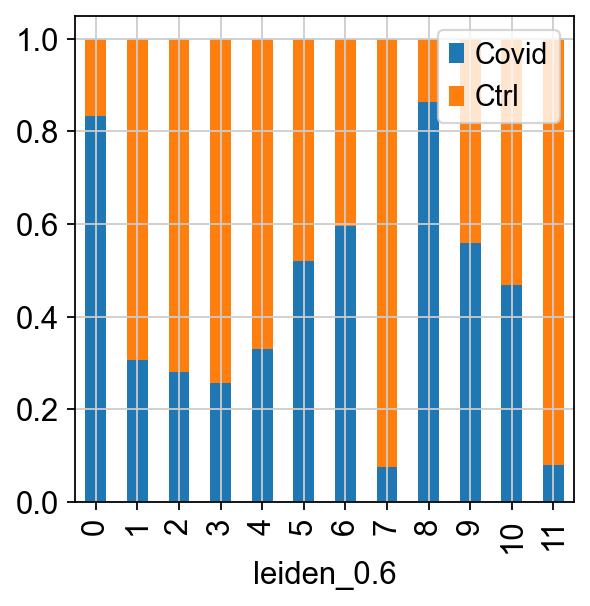

In [8]:
tmp = pd.crosstab(adata.obs['leiden_0.6'],adata.obs['type'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper right')

###Louvain


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 8 clusters and added
    'louvain_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


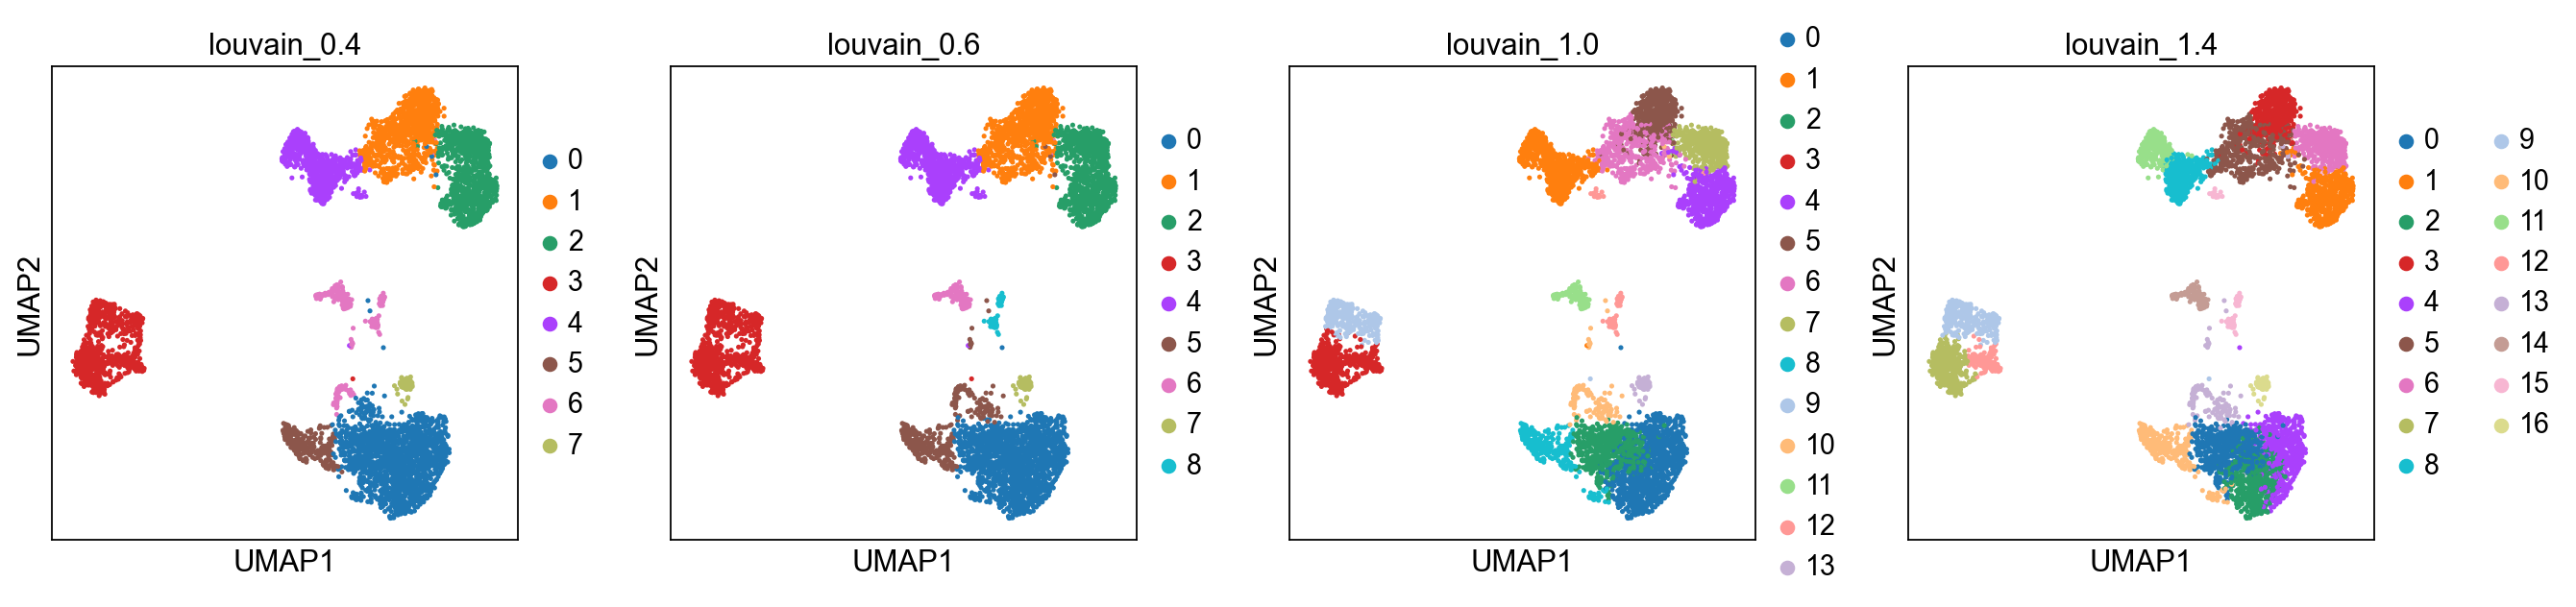

In [9]:
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.louvain(adata, resolution = 0.4, key_added = "louvain_0.4")
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.4")

sc.pl.umap(adata, color=['louvain_0.4', 'louvain_0.6', 'louvain_1.0','louvain_1.4'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['louvain_0.6']"]`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_0.6']`


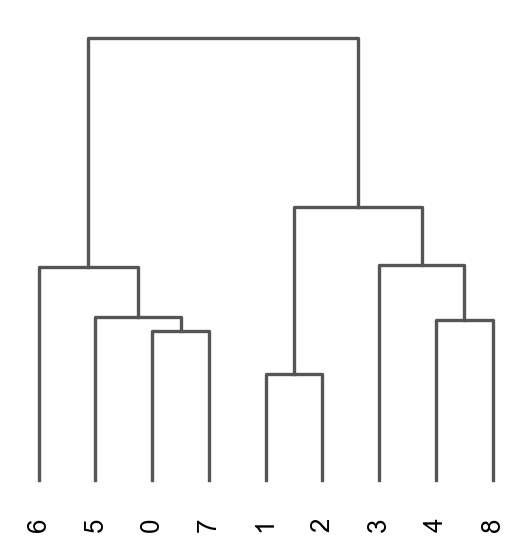

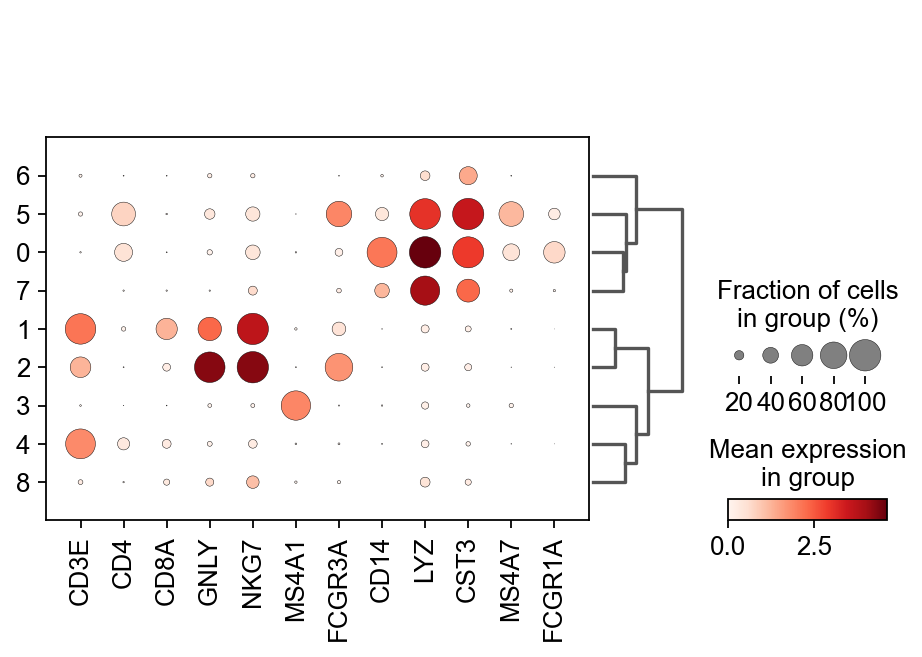

In [10]:
sc.tl.dendrogram(adata, groupby = "louvain_0.6")
sc.pl.dendrogram(adata, groupby = "louvain_0.6")

genes  = ["CD3E", "CD4", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7","FCGR1A"]

sc.pl.dotplot(adata, genes, groupby='louvain_0.6', dendrogram=True)

## K-means clustering
***

K-means is a generic clustering algorithm that has been used in many application areas. In R, it can be applied via the kmeans function. Typically, it is applied to a reduced dimension representation of the expression data (most often PCA, because of the interpretability of the low-dimensional distances). We need to define the number of clusters in advance. Since the results depend on the initialization of the cluster centers, it is typically recommended to run K-means with multiple starting configurations (via the nstart argument).


... storing 'kmeans5' as categorical
... storing 'kmeans10' as categorical
... storing 'kmeans15' as categorical


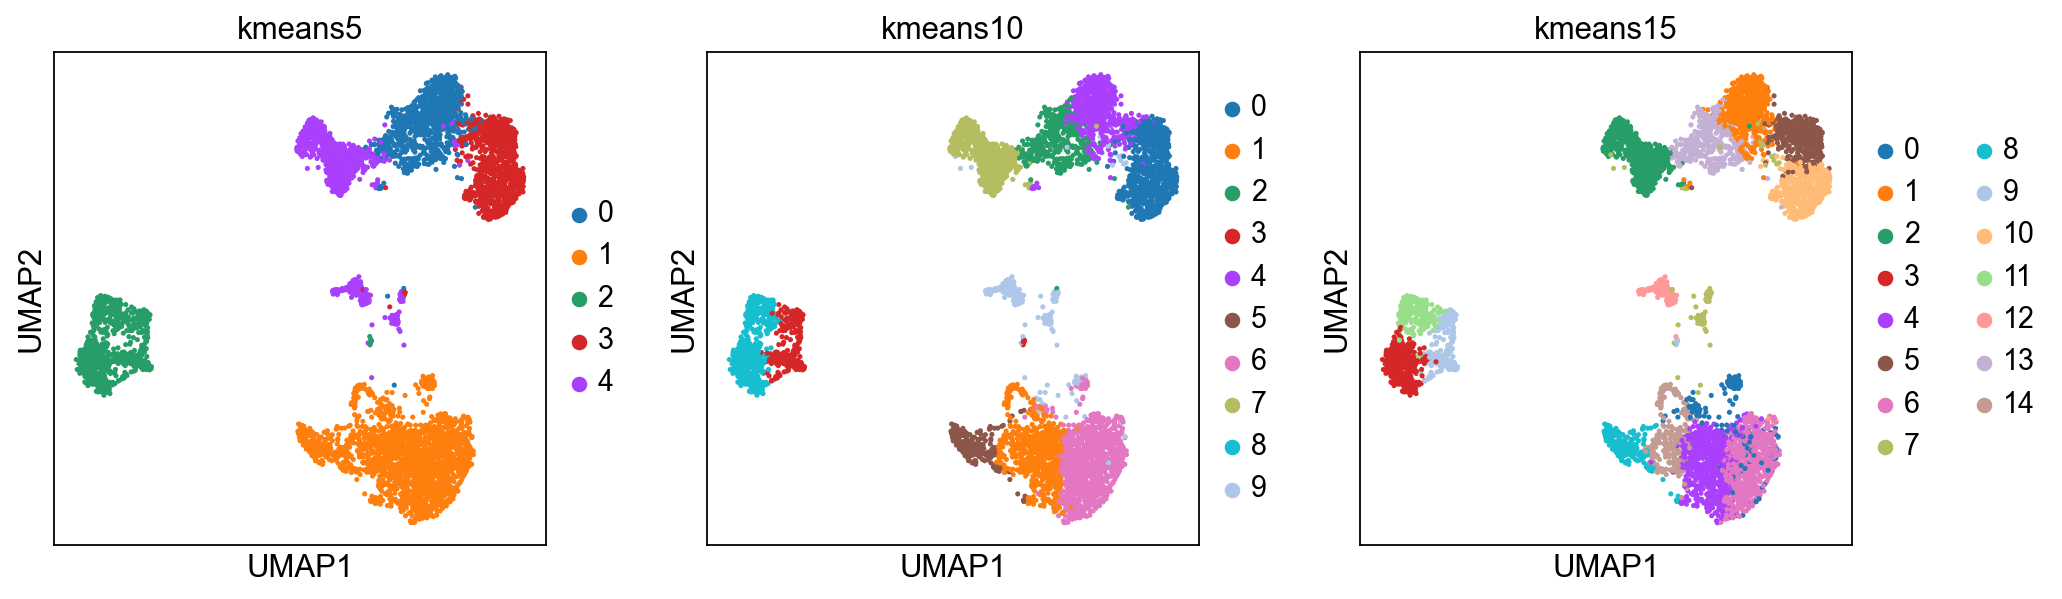

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# extract pca coordinates
X_pca = adata.obsm['Scanorama'] 

# kmeans with k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca) 
adata.obs['kmeans5'] = kmeans.labels_.astype(str)

# kmeans with k=10
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca) 
adata.obs['kmeans10'] = kmeans.labels_.astype(str)

# kmeans with k=15
kmeans = KMeans(n_clusters=15, random_state=0).fit(X_pca) 
adata.obs['kmeans15'] = kmeans.labels_.astype(str)

sc.pl.umap(adata, color=['kmeans5', 'kmeans10', 'kmeans15'])

## Hierarchical clustering
***

Hierarchical clustering is another generic form of clustering that can be applied also to scRNA-seq data. As K-means, it is typically applied to a reduced dimension representation of the data. Hierarchical clustering returns an entire hierarchy of partitionings (a dendrogram) that can be cut at different levels. Hierarchical clustering is done in two steps:

* Step1: Define the distances between samples. The most common are Euclidean distance (a.k.a. straight line between two points) or correlation coefficients.
* Step2: Define a measure of distances between clusters, called *linkage* criteria. It can for example be average distances between clusters. Commonly used methods are `single`, `complete`, `average`, `median`, `centroid` and `ward`.
* Step3: Define the dendrogram among all samples using **Bottom-up** or **Top-down** approach. **Bottom-up** is where samples start with their own cluster which end up merged pair-by-pair until only one cluster is left. **Top-down** is where samples start all in the same cluster that end up being split by 2 until each sample has its own cluster.

 The function `AgglomerativeClustering` has the option of running with disntance metrics “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed". However, with ward linkage only euklidean distances works. Here we will try out euclidean distance and ward linkage calculated in PCA space.


... storing 'hclust_5' as categorical
... storing 'hclust_10' as categorical
... storing 'hclust_15' as categorical


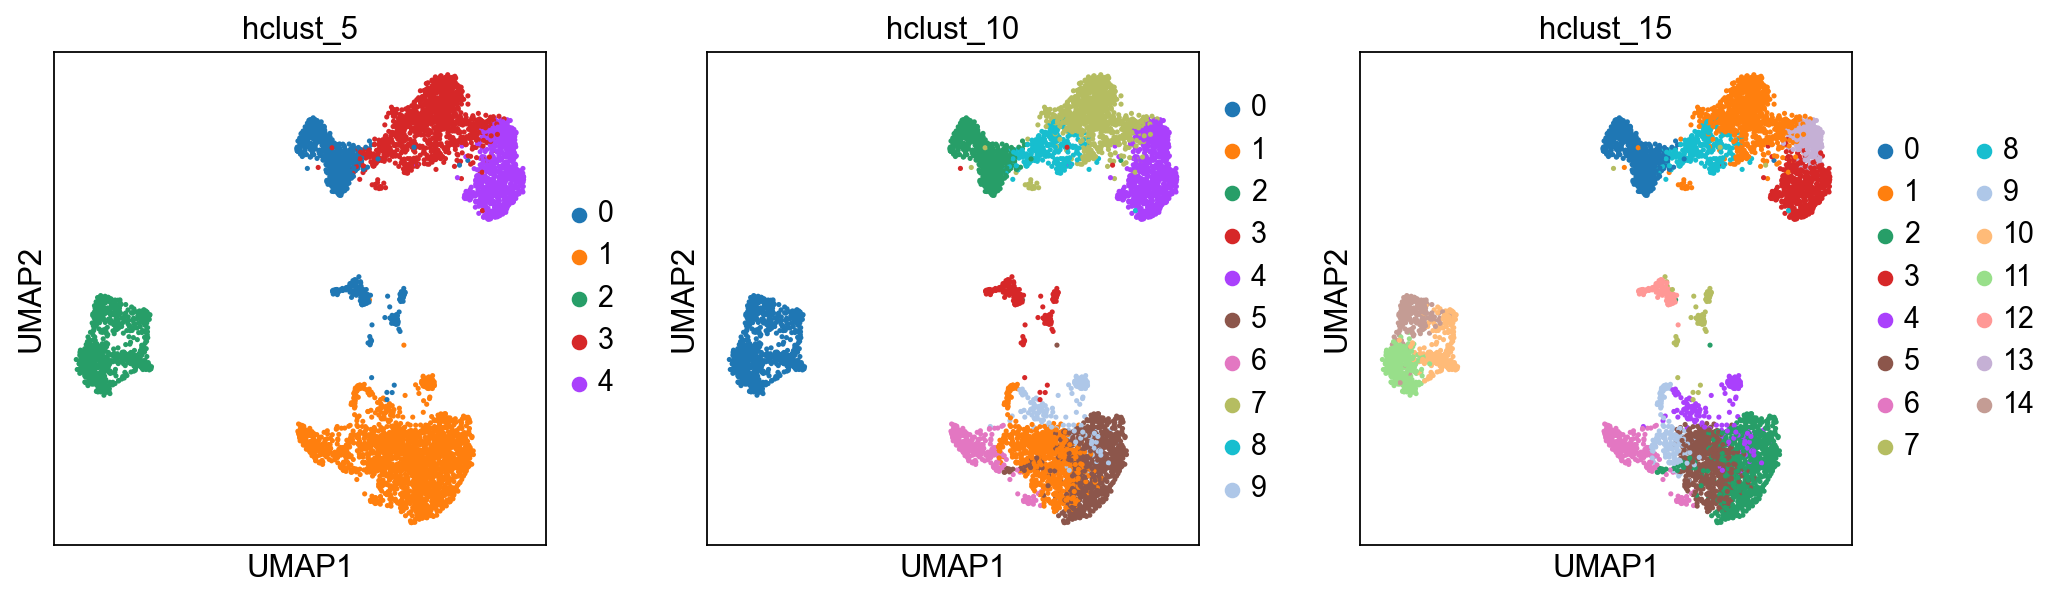

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
adata.obs['hclust_5'] = cluster.fit_predict(X_pca).astype(str)

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
adata.obs['hclust_10'] = cluster.fit_predict(X_pca).astype(str)

cluster = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
adata.obs['hclust_15'] = cluster.fit_predict(X_pca).astype(str)


sc.pl.umap(adata, color=['hclust_5', 'hclust_10', 'hclust_15'])

Finally, lets save the integrated data for further analysis.


In [13]:

adata.write_h5ad('./data/results/scanpy_clustered_covid.h5ad')

<style>
div.blue { background-color:#e6f0ff; border-radius: 5px; padding: 10px;}
</style>
<div class = "blue">
**Your turn**

By now you should know how to plot different features onto your data. Take the QC metrics that were calculated in the first exercise, that should be stored in your data object, and plot it as violin plots per cluster using the clustering method of your choice. For example, plot number of UMIS, detected genes, percent mitochondrial reads.

Then, check carefully if there is any bias in how your data is separated due to quality metrics. Could it be explained biologically, or could you have technical bias there?
</div>
